# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2024 (latest update)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [2]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 0
xmax = 1.0            # Find out yourself what a good interval is.
N_bins = 100         # Find out yourself what a good number of bins is.

# f(x):
def fx_x3(x, C) :
    #Normalizations
    k = (xmax-xmin)/N_bins
    N = N_points*k
    return N * C *x**3 # THere is a C in front of the x**3 to normalize the function

In [3]:
# Define the numpy arrays to be filled:
x_transformation = np.zeros(N_points)
x_accepted       = np.zeros(N_points)

## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].

$$\int_{0}^{1} C*x^3 dx = 1$$

$$ [C/4 * x^4]_0^1 = 1 $$

$$ C/4 = 1 $$

$$ C = 4 $$

$$ f(x) = 4*x^3 $$

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{-\infty}^{x} f(x') dx'$$

$$F(x) = \int_{0}^{1} 4*x'^3 dx'$$

$$F(x) = [x'^4]_0^x = x^4$$

$$F^{-1}(r) = r^{1/4}$$

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

$$ F(x) = \int_{0}^{C} x'^3 dx' = 1$$

$$ F(x) = [1/4 * x'^4]_0^C = 1$$

$$ 1/4 * C^4 = 1$$

$$ C = \sqrt[4]{4} = \sqrt{2} $$

$$F(x) = \int_{0}^{\sqrt{2}} x'^3 dx'$$


4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

## 2

In [4]:
x_transformation = r.uniform(size=N_points)**(1/4) # Transformation method

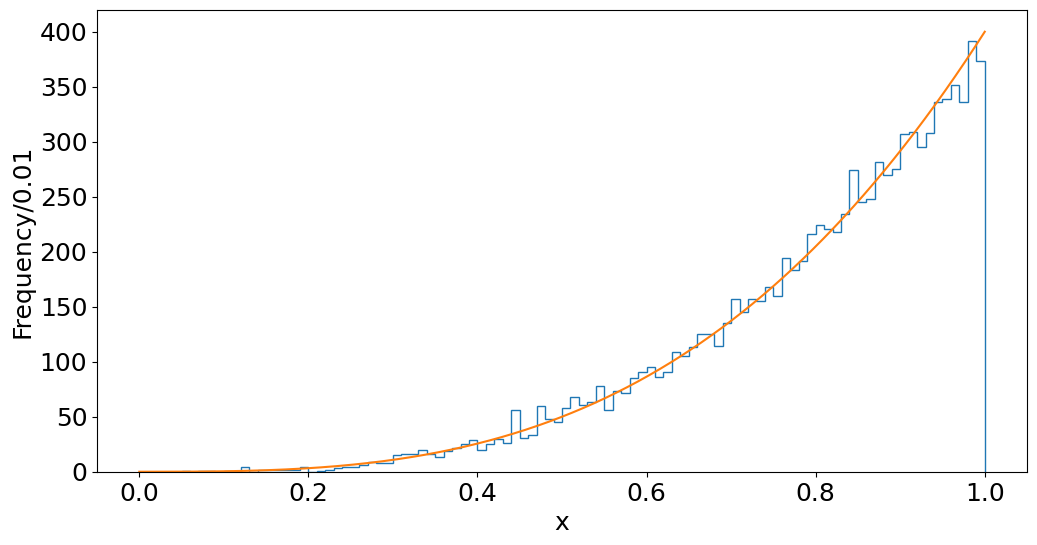

In [5]:
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
ax2.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='Transformation method')
ax2.set(xlabel='x', ylabel='Frequency/{}'.format((xmax-xmin)/N_bins))

x_axis = np.linspace(xmin, xmax, 1000)
y_axis = fx_x3(x_axis, 4)
ax2.plot(x_axis,y_axis, label='f(x) = C*x^3')

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

$$ F(x) = \int_{0}^{C} x'^3 dx' = 1$$

$$ F(x) = [1/4 * x'^4]_0^C = 1$$

$$ 1/4 * C^4 = 1$$

$$ C = \sqrt[4]{4} = \sqrt{2} $$

$$F(x) = \int_{0}^{x} x'^3 dx'$$

$$F(x) = [1/4 * x'^4]_0^x = 1/4 * x^4 = r  => x = \sqrt[4]{4r}$$
 
$$F^{-1}(r) =  \sqrt[4]{4r}$$ 

r is a random number between 0 and 1



In [6]:
x_transformation2 = (4*r.uniform(size=N_points))**(1/4) 

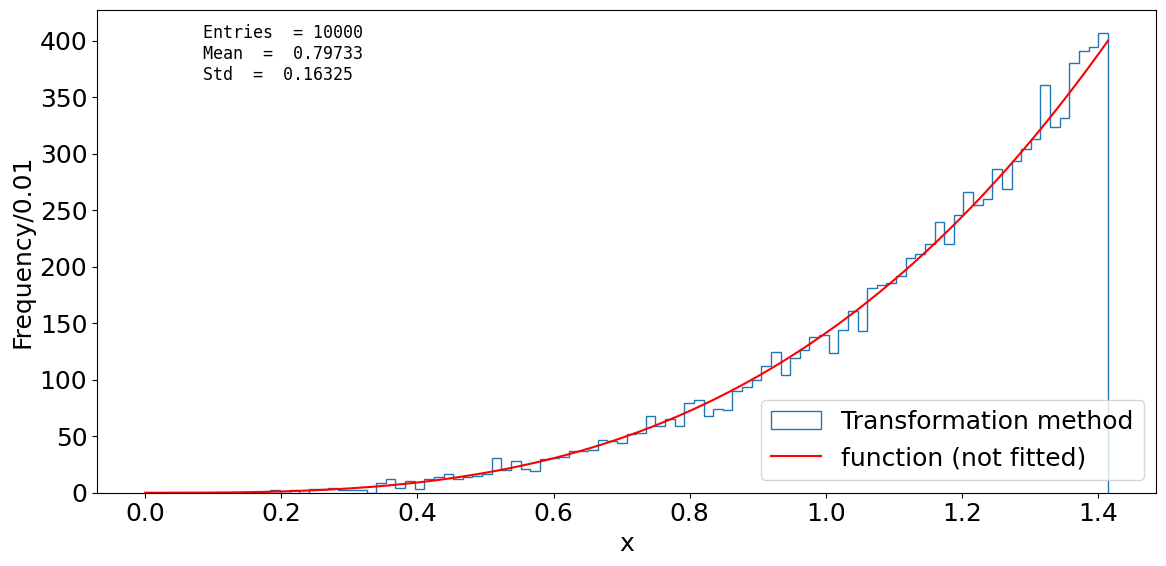

In [7]:
x_max = np.sqrt(2)
x_min = 0

fig, ax = plt.subplots(figsize=(12, 6))
# Plot f(x)
ax.hist(x_transformation2, bins=N_bins, range=(x_min, x_max), histtype='step', label='Transformation method')
ax.set(xlabel='x', ylabel='Frequency/{}'.format((xmax-xmin)/N_bins))
x_axis1 = np.linspace(x_min, x_max, 1000)
y_axis1 = fx_x3(x_axis1, np.sqrt(2))


ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')

# Define figure text
plot_info = ['Entries  = ' + f"{len(x_transformation)}",
     'Mean  =  ' + f"{x_transformation.mean():3.5f}",
     'Std  =  '+ f"{x_transformation.std(ddof=1):3.5f}",
]

# Plot figure text
ax.text(0.1, 0.97, "\n".join(plot_info), family='monospace', fontsize=12, verticalalignment='top',transform=ax.transAxes)

# Add legend
ax.legend(loc='lower right')
fig.tight_layout()


In [8]:
#Fitting to a third degree polynomial

def f(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

# fig, ax = plt.subplots(figsize=(12, 6))
counts, bin_edges = np.histogram(x_transformation2, bins=N_bins, range=(x_min, x_max))
x = (bin_edges[:-1] + bin_edges[1:])/2
x = x[counts>0]
y = counts[counts>0]
yerr = np.sqrt(counts[counts>0])

print(x.shape, y.shape, yerr.shape)

#Using minuit to fit the data
polyfit = cost.LeastSquares(x, y, yerr, f)

mfit = Minuit(polyfit, a=0, b=0, c=0, d=0)
mfit.migrad()


(86,) (86,) (86,)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 69.61 (χ²/ndof = 0.8)      │              Nfcn = 87               │
│ EDM = 1.93e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.9    │    2.5    │            │            │         │         │       │
│ 1 │ b    │    -10    │    17     │            │            │         │         │       │
│ 2 │ c    │     3     │    32     │            │            │         │         │       │
│ 3 │ d    │    145    │    17     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        b        c        d │
├───┼─────────────────────────────────────┤
│ a │     6.25      -41       73      -35 │
│ b │      -41      289  -0.53e3   0.27e3 │
│ c │       73  -0.53e3 1.02e+03  -0.53e3 │
│ d │      -35   0.27e3  -0.53e3      282 │
└───┴─────────────────────────────────────┘

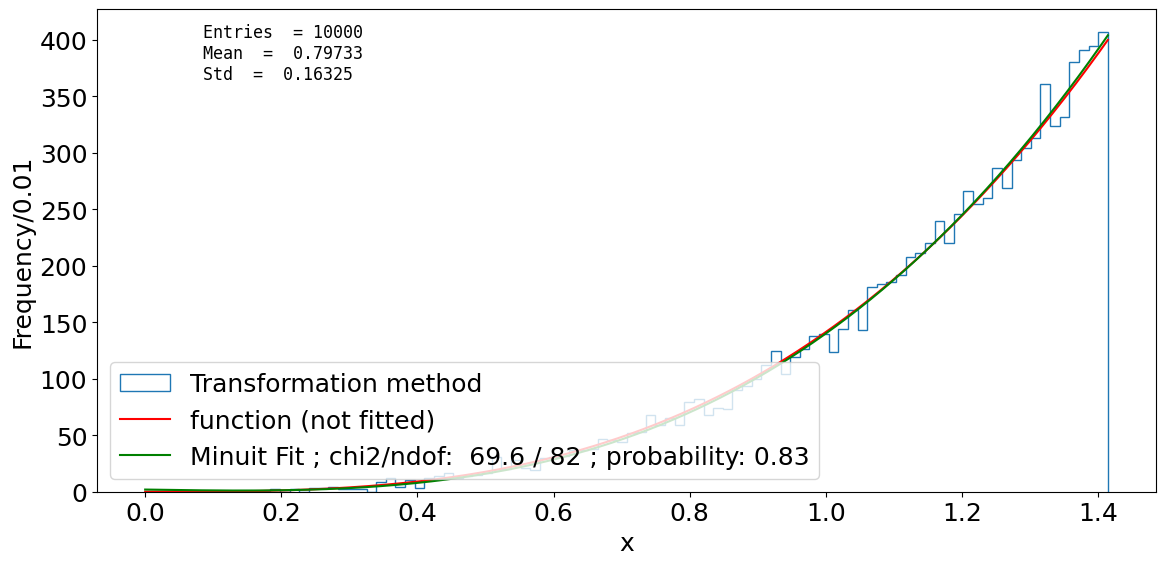

In [9]:
# Plot the fitted function
x_fit = np.linspace(x_min, x_max, 1000)
y_fit = f(x_fit, *mfit.values[:])


chi2 = mfit.fval
ndof = len(x) - len(mfit.values)
prob = stats.chi2.sf(chi2, ndof)

ax.plot(x_fit, y_fit, 'g-', label=f'Minuit Fit ; chi2/ndof:  {chi2:.1f} / {ndof} ; probability: {prob:.2f}')
ax.legend(loc='lower left')
fig.tight_layout()
fig



5) Now try to change the interval from [0,C] to [1,C], and see how the limits change

$$ F(x) = \int_{1}^{C} x'^3 dx' = 1$$

$$ F(x) = [1/4 * x'^4]_1^C = 1$$

$$ 1/4 * C^4 - 1/4 = 1$$

$$ C^4 = 5$$

$$ C = \sqrt[4]{5} $$

Now we need to find the inverted function:

$$F(x) = \int_{1}^{x} x'^3 dx'$$

$$F(x) = [1/4 * x'^4]_1^x = 1/4 * x^4 - 1/4 = r  => x = \sqrt[4]{4r + 1}$$ 

$$F^{-1}(r) =  \sqrt[4]{4r + 1}$$


In [13]:
x_transformation2 = (4*r.uniform(size=N_points) +1)**(1/4)
print(np.max(x_transformation2), np.min(x_transformation2))

x_max2 = 5**(1/4)
x_min2 = 1

def fx_x3(x, C) :
    #Normalizations
    k = (x_max2-x_min2)/N_bins
    N = N_points*k
    return N * C *x**3

1.4952857847197638 1.0000055366297564


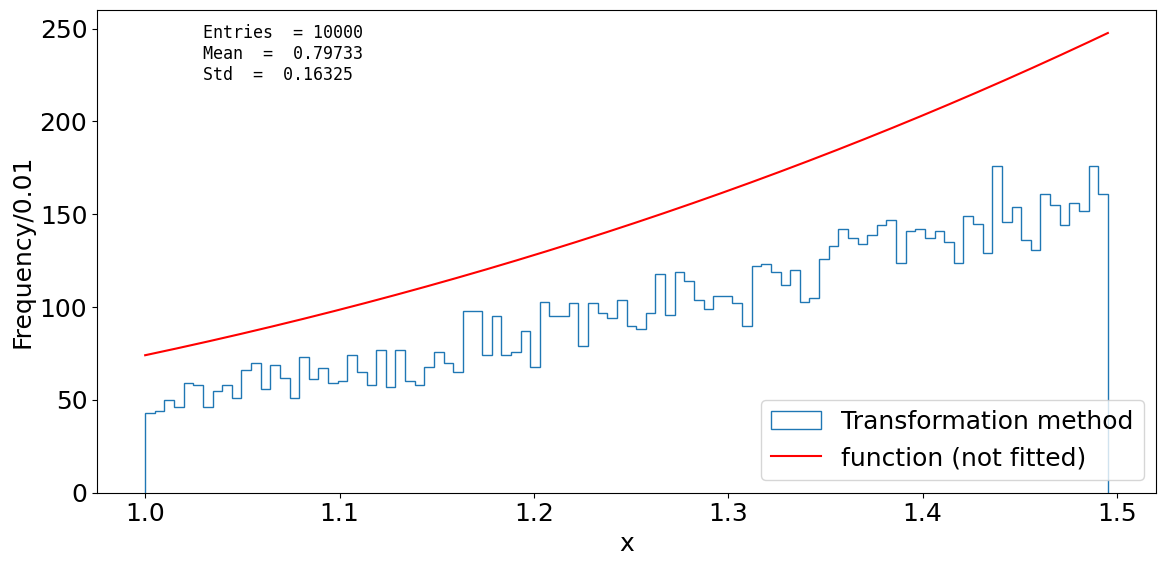

In [11]:


fig, ax = plt.subplots(figsize=(12, 6))
# Plot f(x)
ax.hist(x_transformation2, bins=N_bins, range=(x_min2, x_max2), histtype='step', label='Transformation method')
ax.set(xlabel='x', ylabel='Frequency/{}'.format((xmax-xmin)/N_bins))
x_axis2 = np.linspace(x_min2, x_max2, 1000)
y_axis2 = fx_x3(x_axis2, 5**(1/4))


ax.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Define figure text
plot_info = ['Entries  = ' + f"{len(x_transformation)}",
     'Mean  =  ' + f"{x_transformation.mean():3.5f}",
     'Std  =  '+ f"{x_transformation.std(ddof=1):3.5f}",
]

# Plot figure text
ax.text(0.1, 0.97, "\n".join(plot_info), family='monospace', fontsize=12, verticalalignment='top',transform=ax.transAxes)

# Add legend
ax.legend(loc='lower right')
fig.tight_layout()

0.9893750811213654
1.4953487812212205


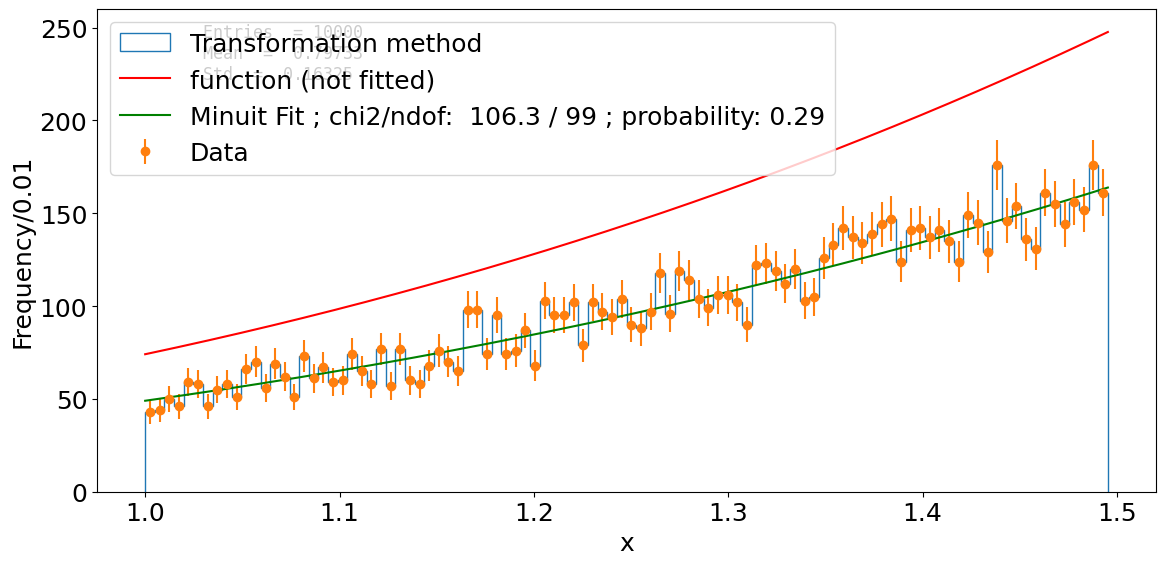

In [12]:
counts, bin_edges = np.histogram(x_transformation2, bins=N_bins, range=(x_min2, x_max2))
x = (bin_edges[:-1] + bin_edges[1:])/2
x = x[counts>0]
y = counts[counts>0]
yerr = np.sqrt(counts[counts>0])

ax.errorbar(x, y, yerr, fmt='o', label='Data')
#Using minuit to fit the data
fit = cost.LeastSquares(x, y, yerr, fx_x3)

mfit2 = Minuit(fit, C = 1)
mfit2.migrad()

print(mfit2.values['C'])
print(5**(1/4))


x_fit2 = np.linspace(x_min2, x_max2, 1000)
y_fit2 = fx_x3(x_fit2, *mfit2.values[:])


chi2 = mfit2.fval
ndof = len(x) - len(mfit2.values)
prob = stats.chi2.sf(chi2, ndof)

ax.plot(x_fit2, y_fit2, 'g-', label=f'Minuit Fit ; chi2/ndof:  {chi2:.1f} / {ndof} ; probability: {prob:.2f}')
ax.legend(loc='best')
fig.tight_layout()
fig

# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.